# Minggu 4: Menangani Gambar Kompleks - Set Data Bahagia atau Sedih

Dalam tugas ini Anda akan menggunakan kumpulan data senang atau sedih, yang berisi 80 gambar wajah mirip emoji, 40 gambar senang dan 40 gambar sedih.

Buat jaringan neural konvolusional yang melatih akurasi hingga 99,9% pada gambar ini, yang membatalkan pelatihan setelah mencapai ambang akurasi pelatihan ini.

## Muat dan jelajahi data

Mulailah dengan melihat beberapa gambar dari kumpulan data.

Perhatikan bahwa semua gambar berada di dalam direktori `./data/`.

Direktori ini berisi dua subdirektori `happy/` dan `sad/` dan setiap gambar disimpan di bawah subdirektori yang terkait dengan kelas yang dimilikinya.

In [1]:
! chmod 600 kaggle.json

In [2]:
! KAGGLE_CONFIG_DIR=./ kaggle  datasets download -d heliprajapati/facereg

 67% 17.0M/25.2M [00:00<00:00, 70.4MB/s]
100% 25.2M/25.2M [00:00<00:00, 84.9MB/s]


In [3]:
import zipfile

zip_ref = zipfile.ZipFile('facereg.zip', 'r')
zip_ref.extractall('facereg')
zip_ref.close()

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

Sample happy image:


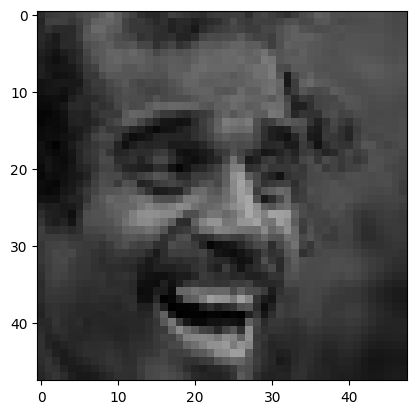


Sample sad image:


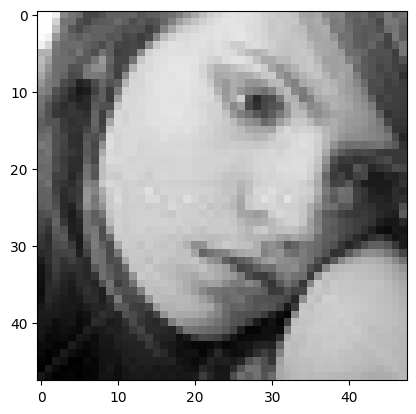

In [5]:
from tensorflow.keras.preprocessing.image import load_img

# buat direktori
base_dir_train = './facereg/archive/Training/'
train_happy_dir = os.path.join(base_dir_train, 'Happy/')
train_sad_dir = os.path.join(base_dir_train, 'Sad/')

base_dir_test = './facereg/archive/Testing/'
test_happy_dir = os.path.join(base_dir_test, 'Happy/')
test_sad_dir = os.path.join(base_dir_test, 'Sad/')


print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(train_happy_dir, os.listdir(train_happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(train_sad_dir, os.listdir(train_sad_dir)[0])}"))
plt.show()


In [19]:
train_happy_names = os.listdir(train_happy_dir)
print(f'TRAIN SET HORSES: {train_happy_names[:10]}')

train_sad_names = os.listdir(train_sad_dir)
print(f'TRAIN SET HUMANS: {train_sad_names[:10]}')

test_happy_hames = os.listdir(test_happy_dir)
print(f'VAL SET HORSES: {test_happy_hames[:10]}')

test_sad_names = os.listdir(test_sad_dir)
print(f'VAL SET HUMANS: {test_sad_names[:10]}')

TRAIN SET HORSES: ['Happy-5167.jpg', 'Happy-4035.jpg', 'Happy-332.jpg', 'Happy-1383.jpg', 'Happy-4036.jpg', 'Happy-3017.jpg', 'Happy-3115.jpg', 'Happy-3070.jpg', 'Happy-3124.jpg', 'Happy-6406.jpg']
TRAIN SET HUMANS: ['Sad-4010.jpg', 'Sad-4279.jpg', 'Sad-3267.jpg', 'Sad-1945.jpg', 'Sad-883.jpg', 'Sad-4059.jpg', 'Sad-4596.jpg', 'Sad-1301.jpg', 'Sad-1560.jpg', 'Sad-2854.jpg']
VAL SET HORSES: ['Happy-332.jpg', 'Happy-1383.jpg', 'Happy-1151.jpg', 'Happy-881.jpg', 'Happy-128.jpg', 'Happy-654.jpg', 'Happy-1541.jpg', 'Happy-95.jpg', 'Happy-1388.jpg', 'Happy-1720.jpg']
VAL SET HUMANS: ['Sad-883.jpg', 'Sad-241.jpg', 'Sad-1212.jpg', 'Sad-1033.jpg', 'Sad-1144.jpg', 'Sad-406.jpg', 'Sad-775.jpg', 'Sad-964.jpg', 'Sad-274.jpg', 'Sad-1052.jpg']


In [6]:
print(f'total training happy images: {len(os.listdir(train_happy_dir))}')
print(f'total training sad images: {len(os.listdir(train_sad_dir))}')
print(f'total testing happy images: {len(os.listdir(test_happy_dir))}')
print(f'total training sad images: {len(os.listdir(test_sad_dir))}')

total training happy images: 7215
total training sad images: 4830
total testing happy images: 1774
total training sad images: 1247


Sangat keren untuk dapat melihat contoh gambar untuk lebih memahami ruang masalah yang Anda hadapi.

Namun masih ada beberapa informasi relevan yang hilang seperti resolusi gambar (walaupun matplotlib merender gambar dalam kisi yang memberikan gambaran bagus tentang nilai-nilai ini) dan nilai piksel maksimum (ini penting untuk menormalkan nilai-nilai ini). Untuk ini, Anda dapat menggunakan Keras seperti yang ditunjukkan pada sel berikutnya:

In [7]:
from tensorflow.keras.preprocessing.image import img_to_array

sample_image = load_img(f"{os.path.join(train_happy_dir, os.listdir(train_happy_dir)[0])}")

sample_array = img_to_array(sample_image)

print(f'tiap array memiliki ukuran {sample_array.shape}')
print(f'nilai maksimum array {np.max(sample_array)}')

tiap array memiliki ukuran (48, 48, 3)
nilai maksimum array 168.0


## Menentukan panggilan balik

Karena Anda telah mengkodekan panggilan balik yang bertanggung jawab untuk menghentikan pelatihan (setelah tingkat akurasi yang diinginkan tercapai) dalam dua tugas sebelumnya kali ini sudah disediakan sehingga Anda dapat fokus pada langkah lainnya:

In [11]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
      print(' Model sudah mencapai target ')
      self.model.stop_training = True

callbacks = mycallback()

Catatan singkat tentang callback:

Sejauh ini Anda hanya menggunakan callback `on_epoch_end` tetapi masih banyak lagi. Misalnya, Anda mungkin ingin melihat callback [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), yang memungkinkan Anda menyimpan bobot terbaik untuk model Anda.

## Pra-pemrosesan data

Keras memberikan dukungan besar untuk preprocessing data gambar. Banyak yang bisa dicapai dengan menggunakan kelas `ImageDataGenerator`. Pastikan untuk memeriksa [dokumen](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) jika Anda mengalami kebuntuan di latihan berikutnya. Khususnya Anda mungkin ingin memperhatikan argumen `rescale` saat membuat instance `ImageDataGenerator` dan ke [`flow_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image /ImageDataGenerator#flow_from_directory).

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
      directory = base_dir_train,
      target_size = (50, 50),
      batch_size = 10,
      class_mode = 'binary'
  )

test_generator = test_datagen.flow_from_directory(
      directory = base_dir_test,
      target_size = (50, 50),
      batch_size = 10,
      class_mode = 'binary'
  )


Found 12045 images belonging to 2 classes.
Found 3021 images belonging to 2 classes.


## Membuat dan melatih model Anda

Terakhir, selesaikan fungsi `train_happy_sad_model` di bawah ini. Fungsi ini harus mengembalikan jaringan saraf Anda.

**Model Anda harus mencapai akurasi 99,9% atau lebih sebelum 15 epoch untuk lulus tugas ini.**

**Petunjuk:**
- Anda dapat mencoba arsitektur apa pun untuk jaringan tetapi perlu diingat bahwa model akan bekerja paling baik dengan 3 lapisan konvolusional.


- Jika Anda memerlukan bantuan tambahan, Anda dapat melihat beberapa tip di bagian akhir buku catatan ini.

In [18]:
# buat model

from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(50, 50, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(train_generator, epochs=20, callbacks=callbacks, validation_data=test_generator)

Epoch 1/20
1205/1205 [==============================] - 53s 43ms/step - loss: 0.5596 - accuracy: 0.7003 - val_loss: 0.4897 - val_accuracy: 0.7471
Epoch 2/20
1205/1205 [==============================] - 47s 39ms/step - loss: 0.4341 - accuracy: 0.7871 - val_loss: 0.4802 - val_accuracy: 0.7835
Epoch 3/20
1205/1205 [==============================] - 50s 42ms/step - loss: 0.3785 - accuracy: 0.8245 - val_loss: 0.3973 - val_accuracy: 0.8193
Epoch 4/20
1205/1205 [==============================] - 49s 41ms/step - loss: 0.3393 - accuracy: 0.8457 - val_loss: 0.3663 - val_accuracy: 0.8418
Epoch 5/20
1205/1205 [==============================] - 49s 41ms/step - loss: 0.3031 - accuracy: 0.8693 - val_loss: 0.3747 - val_accuracy: 0.8335
Epoch 6/20
1205/1205 [==============================] - 51s 42ms/step - loss: 0.2716 - accuracy: 0.8853 - val_loss: 0.4389 - val_accuracy: 0.8130
Epoch 7/20
1205/1205 [==============================] - 49s 41ms/step - loss: 0.2487 - accuracy: 0.8962 - val_loss: 0.3839 -

In [22]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(50, 50))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a happy")
  else:
    print(fn + " is a sad")

Saving 65-658471_happy-man-happy-man-face-png.png to 65-658471_happy-man-happy-man-face-png (2).png
1/1 [==============================] - 0s 22ms/step
[1.]
65-658471_happy-man-happy-man-face-png.png is a happy


1/1 [==============================] - 0s 159ms/step


<ipython-input-24-f3b4fea134f1>:47: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


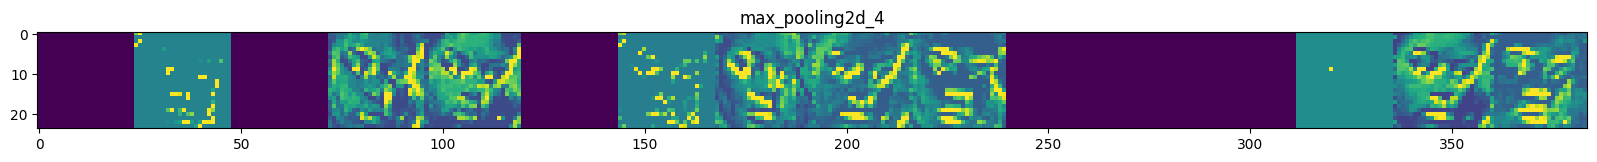

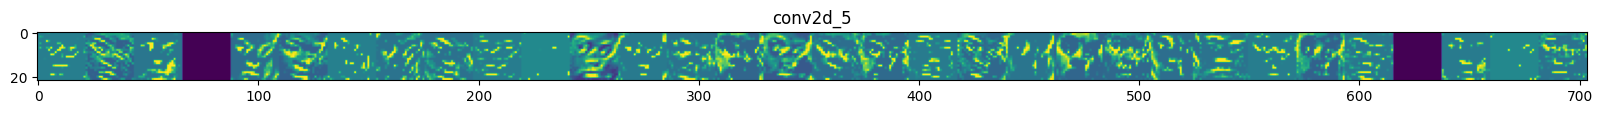

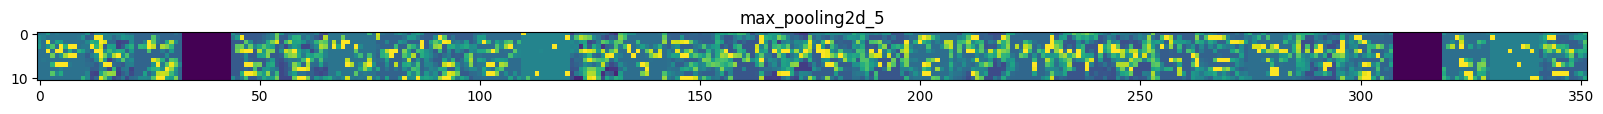

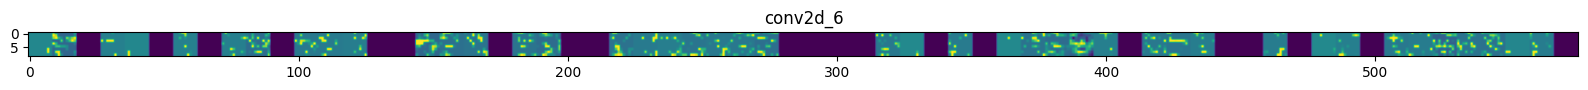

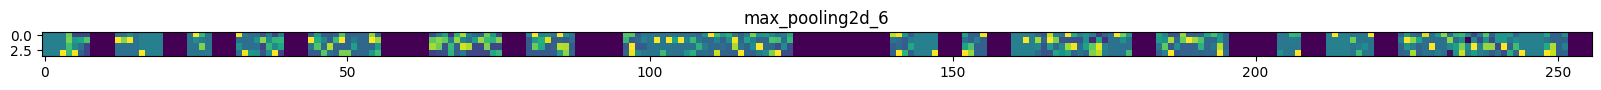

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_happy_dir, f) for f in train_happy_names]
human_img_files = [os.path.join(train_sad_dir, f) for f in train_sad_names]
img_path = random.choice(horse_img_files + human_img_files)
img = load_img(img_path, target_size=(50, 50))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')